This notebook tries to check if the recorded coordinates are well interpreted

In [4]:
%load_ext autoreload
%autoreload 2

In [8]:
import csv
import os
import numpy as np
from matplotlib import pyplot as plt
import augment
import imageProcessing as ip
import random
from Config import Config

In [12]:
# Open the CSV file and read its contents into a dictionary
# The stored data is: picture_name, x1, y1, x2, y2 
with open(Config.coords_file_path, mode='r') as file:
    reader = csv.DictReader(file)  # Use DictReader to automatically map rows to dictionaries
    data = [row for row in reader]  # Convert each row into a dictionary and store in a list

[[132.81105041503906, 33.543434143066406]]
[[29.02560806274414, 22.095256805419922], [63.29008483886719, 15.440229415893555]]
(80, 160, 3)


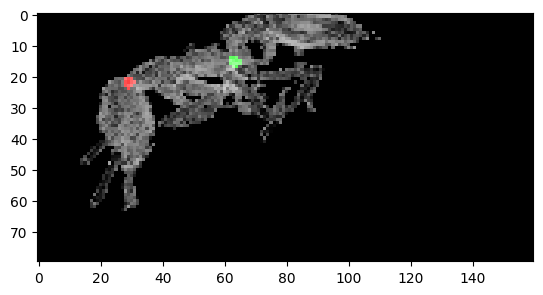

[[130.61683654785156, 6.642199993133545], [109.67450714111328, 24.84383201599121]]
(80, 160, 3)


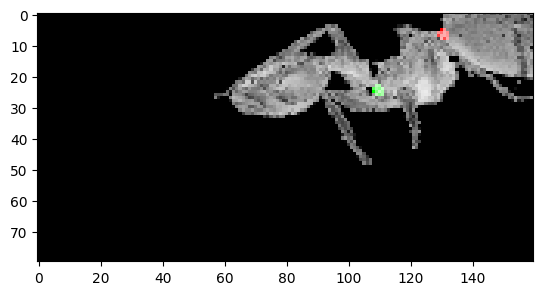

[[132.20755004882812, 63.5263786315918], [106.95333099365234, 53.52706527709961]]
(80, 160, 3)


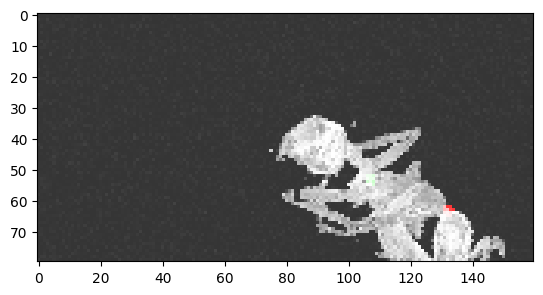

[[68.2630615234375, 30.520084381103516], [86.86563110351562, 42.12865447998047]]
(80, 160, 3)


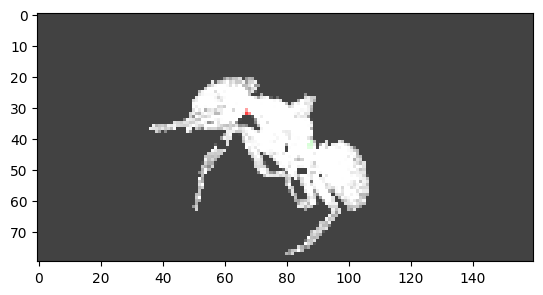

[[35.85569091796875, 2.2285502115885416], [47.304814453125, 18.58348388671875]]
(80, 160, 3)


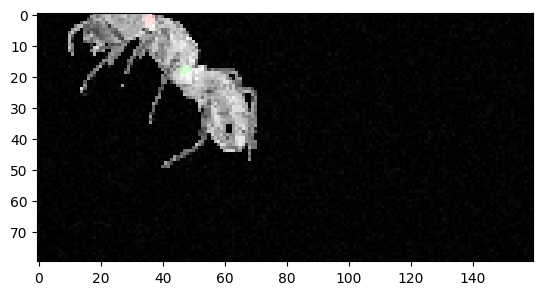

[[66.84960174560547, 3.6014201641082764], [77.38933563232422, 25.78889274597168]]
(80, 160, 3)


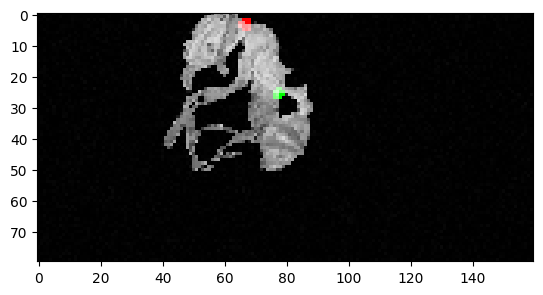

[[102.76553344726562, 38.57640075683594], [72.76532745361328, 43.37763214111328]]
(80, 160, 3)


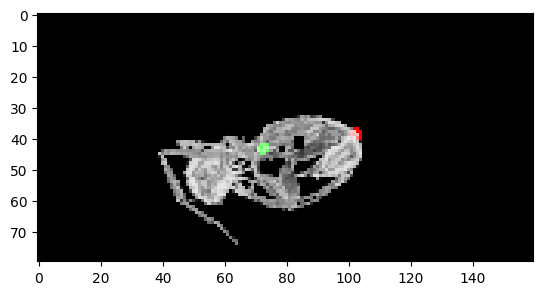

[[79.89749145507812, 47.133358001708984], [43.08985900878906, 23.35460662841797]]
(80, 160, 3)


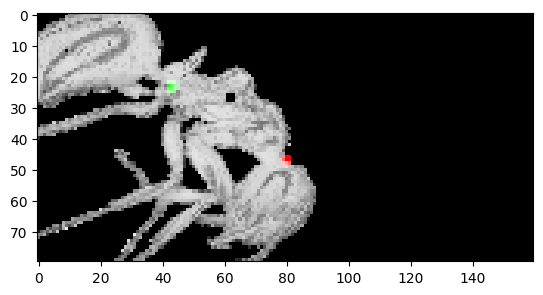

[[112.36758422851562, 29.575647354125977], [82.65748596191406, 46.82322311401367]]
(80, 160, 3)


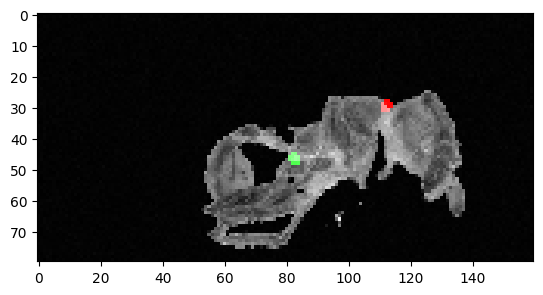

[[53.55007553100586, 43.64179611206055], [93.32530212402344, 41.136314392089844]]
(80, 160, 3)


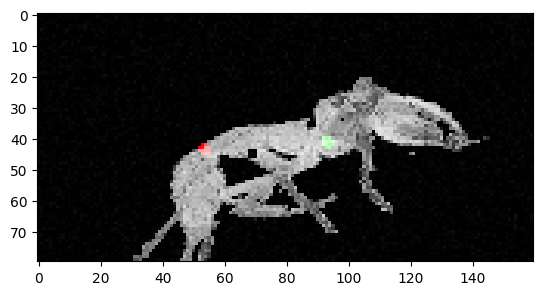

[[71.98164367675781, 38.52770233154297], [33.35776901245117, 40.71123123168945]]
(80, 160, 3)


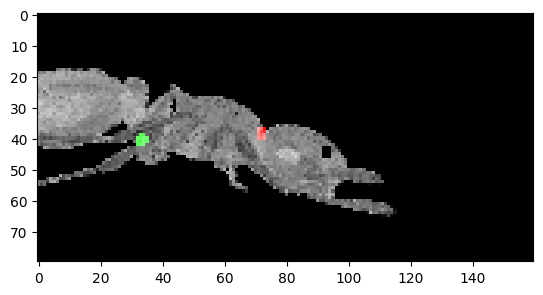

[[57.37531280517578, 47.83844757080078], [33.47602081298828, 47.01454544067383]]
(80, 160, 3)


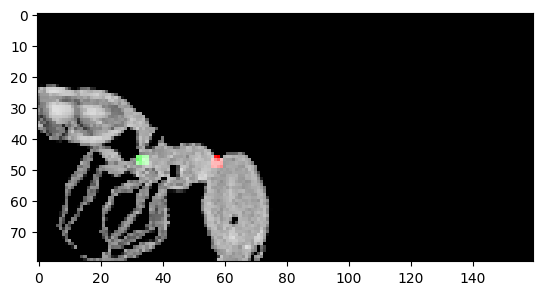

[[43.2381477355957, 22.818700790405273], [27.709745407104492, 39.12331771850586]]
(80, 160, 3)


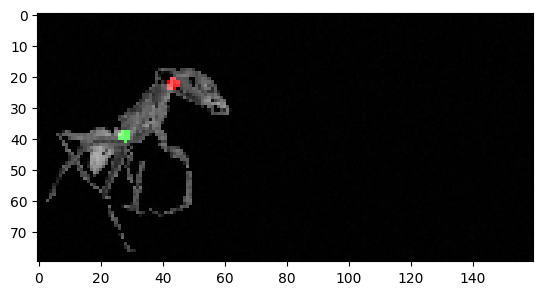

[[109.9320297241211, 24.149492263793945], [127.61947631835938, 37.412837982177734]]
(80, 160, 3)


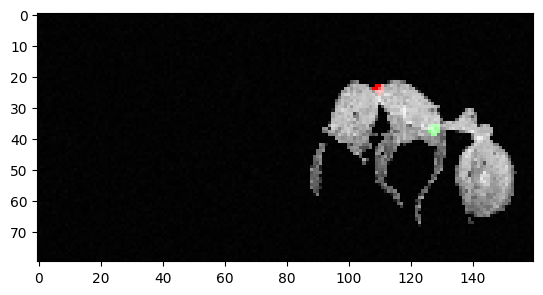

In [13]:
# Add the image to the image_data dictionnary (seemed more convenient but might actually be stupid)
for image_data in random.sample(data, 15):
    name = image_data["Image Name"]
    img_path = os.path.join("clean", name)
    # Replace the suffix with .png
    base, _ = os.path.splitext(img_path)
    img_path = f"{base}.png"
    x1, y1 = image_data["x1"], image_data["y1"]
    x2, y2 = image_data["x2"], image_data["y2"]
    #x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    img, keypoints = augment.prepare_for_model(img_path, [(x1, y1), (x2, y2)])

    print(keypoints)

    if len(keypoints) == 2:
        point1, point2 = keypoints[0], keypoints[1]
        rgb = ip.add_point_channels(img, point1, point2)
        print(rgb.shape)

        plt.plot()
        plt.imshow(rgb, cmap = "gray")
        plt.show()


Success !!